In [2]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
df1 = spark.sql(""" select *
from KPMG_Bronze.dbo.EDW_Conmed_Sales_Data_Mart""")
df1.columns

StatementMeta(, d53faf90-0def-4019-aa73-ab8ec44cbe65, 4, Finished, Available, Finished)

['Operating_Unit',
 'Account_Number',
 'Account_Name',
 'ShipTo_Site_Name',
 'ShipTo_Site_Use_ID',
 'ShipToAddress1',
 'ShipToAddress2',
 'ShipToAddress3',
 'ShipToCity',
 'ShipToState',
 'ShipToZip',
 'ShipToCountry',
 'ShipToCountryName',
 'CUSTOMER_CLASS_CODE',
 'ORACLE_PARTY_SITE_ID',
 'PARTY_SITE_NUMBER',
 'Invoice_Number',
 'Invoice_Line_ID',
 'Commissioned_Date',
 'Invoiced_Date',
 'GL_Date',
 'Order_Line_ID',
 'Order_Number',
 'Order_Revision',
 'Cust_PO_Number',
 'Ordered_Date',
 'Order_Type',
 'Order_Line_Type',
 'Invoice_Line_Num',
 'FLOW_STATUS_CODE',
 'Item_Number',
 'GS_Item_Number',
 'Inventory_Item_ID',
 'ORGANIZATION_ID',
 'ORGANIZATION_CODE',
 'ORGANIZATION_NAME',
 'Item_Cost',
 'Item_Description',
 'Product_Segment',
 'Product_Segment_BU',
 'Product_Segment_Product_GRP',
 'Product_Segment_Product_Sub_GRP',
 'Product_Segment_OS_Brand',
 'Product_Segment_Description',
 'Product_Segment_Extnl_Cap_Disp',
 'Product_Segment_Current',
 'Product_Segment_Current_BU',
 'Produc

In [4]:
df = spark.sql(""" select Order_Line_ID,
Account_Number,
DESCRIPTIOND,
Invoiced_Date,
Product_Segment_Current_Extnl_Cap_Disp,
Product_Segment_Extnl_Cap_Disp,
Capital_Disp_Inv_Item
from KPMG_Bronze.dbo.EDW_Conmed_Sales_Data_Mart""")

StatementMeta(, 2df15b97-196a-4472-9193-ef639a6b9077, 6, Finished, Available, Finished)

In [4]:
df.columns

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 6, Finished, Available, Finished)

['Order_Line_ID',
 'Account_Number',
 'DESCRIPTIOND',
 'Invoiced_Date',
 'Product_Segment_Current_Extnl_Cap_Disp',
 'Product_Segment_Extnl_Cap_Disp',
 'Capital_Disp_Inv_Item']

In [5]:
shape = (df.count(), len(df.columns))
print(f"Shape: {shape}")



StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 7, Finished, Available, Finished)

Shape: (2082385, 7)


In [6]:
df.show()

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 8, Finished, Available, Finished)

+-------------+--------------+--------------------+-------------+--------------------------------------+------------------------------+---------------------+
|Order_Line_ID|Account_Number|        DESCRIPTIOND|Invoiced_Date|Product_Segment_Current_Extnl_Cap_Disp|Product_Segment_Extnl_Cap_Disp|Capital_Disp_Inv_Item|
+-------------+--------------+--------------------+-------------+--------------------------------------+------------------------------+---------------------+
|         NULL|      05218101|DOOLEY,KOZITZA - ...|   2021-02-12|                            Single Use|                    Single Use|           Unassigned|
|         NULL|      05218101|DOOLEY,KOZITZA - ...|   2021-03-25|                            Single Use|                    Single Use|           Unassigned|
|         NULL|      05218101|DOOLEY,KOZITZA - ...|   2021-05-26|                            Single Use|                    Single Use|           Unassigned|
|         NULL|      05218101|DOOLEY,KOZITZA - ...| 

In [7]:
unique_combinations = df.select("Order_Line_ID", "Account_Number","DESCRIPTIOND", "Invoiced_Date","Product_Segment_Current_Extnl_Cap_Disp",
"Product_Segment_Extnl_Cap_Disp",
"Capital_Disp_Inv_Item").distinct()
unique_combinations.show()

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 9, Finished, Available, Finished)

+--------------------+--------------+--------------------+-------------+--------------------------------------+------------------------------+---------------------+
|       Order_Line_ID|Account_Number|        DESCRIPTIOND|Invoiced_Date|Product_Segment_Current_Extnl_Cap_Disp|Product_Segment_Extnl_Cap_Disp|Capital_Disp_Inv_Item|
+--------------------+--------------+--------------------+-------------+--------------------------------------+------------------------------+---------------------+
|29375528.00000000...|         16923|JOHN TARANTINO - ...|   2021-12-22|                            Single Use|                    Single Use|           Disposable|
|29216215.00000000...|         20507|JOHN TARANTINO - ...|   2021-11-29|                            Single Use|                    Single Use|           Disposable|
|27814119.00000000...|         19437|PETER CARIELLO - ...|   2021-04-07|                            Single Use|                    Single Use|           Disposable|
|28830599.

In [8]:
unique_shape = (unique_combinations.count(), len(unique_combinations.columns))
print(f"Shape: {unique_shape}")

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 10, Finished, Available, Finished)

Shape: (1890550, 7)


In [9]:
df2 = spark.sql(""" select
Product_Segment_Current_Extnl_Cap_Disp,
Product_Segment_Extnl_Cap_Disp,
Capital_Disp_Inv_Item
from KPMG_Bronze.dbo.EDW_Conmed_Sales_Data_Mart""")

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 11, Finished, Available, Finished)

In [10]:
df2.show()

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 12, Finished, Available, Finished)

+--------------------------------------+------------------------------+---------------------+
|Product_Segment_Current_Extnl_Cap_Disp|Product_Segment_Extnl_Cap_Disp|Capital_Disp_Inv_Item|
+--------------------------------------+------------------------------+---------------------+
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    Single Use|           Unassigned|
|                            Single Use|                    

In [11]:
# Count the occurrences of each value in the column
counts_df = df.groupBy("Product_Segment_Current_Extnl_Cap_Disp").count()

# Show the counts
counts_df.show()


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 13, Finished, Available, Finished)

+--------------------------------------+-------+
|Product_Segment_Current_Extnl_Cap_Disp|  count|
+--------------------------------------+-------+
|                               Capital| 428577|
|                            Single Use|1653580|
|                             Undefined|    228|
+--------------------------------------+-------+



In [12]:
# Count the occurrences of each value in the column
counts_df = df.groupBy("Product_Segment_Extnl_Cap_Disp").count()

# Show the counts
counts_df.show()


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 14, Finished, Available, Finished)

+------------------------------+-------+
|Product_Segment_Extnl_Cap_Disp|  count|
+------------------------------+-------+
|                       Capital| 428414|
|                    Single Use|1653971|
+------------------------------+-------+



In [13]:
# Count the occurrences of each value in the column
counts_df = df.groupBy("Capital_Disp_Inv_Item").count()

# Show the counts
counts_df.show()

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 15, Finished, Available, Finished)

+---------------------+-------+
|Capital_Disp_Inv_Item|  count|
+---------------------+-------+
|              Capital| 480895|
|            Component|  41924|
|            Bill Code| 137586|
|          Charge Item|   8147|
|           Unassigned| 144535|
|            Undefined|   6275|
|             Reusable|  19030|
|           Disposable|1243941|
|       Not Applicable|     52|
+---------------------+-------+



In [3]:
df.select('DESCRIPTIONF').distinct().show()

StatementMeta(, d53faf90-0def-4019-aa73-ab8ec44cbe65, 5, Finished, Available, Finished)

NameError: name 'df' is not defined

In [15]:
from pyspark.sql import functions as F

# List of top 20 names
top_20_names = [
    "TODD ROUNSAVILLE", "JAMES WALLACE", "JOSH LANNI - VITAMED", "MIKE COPPENS - AD", 
    "STEVE QUELLHORST", "KIM BUTCHER - BUT", "JEFF SHEVALIER", "PAUL CROOKSTON", 
    "BEN WILSON - RPJ", "MATT GRIGG - MIDW", "PETER CARIELLO", "JOHN MATYE - TEXA", 
    "PHILLIP STEWART", "JEFF STEVENS - TR", "RYAN EARLEY - REM", "JOHN TARANTINO", 
    "CODY SADLER - NOR", "DEAN,VICKERS - OG", "DOOLEY,KOZITZA", "DAVE METZ - DRM"
]

# Filter the dataframe to include only rows with the top 20 names in DESCRIPTIOND
filtered_df = df.filter(df["DESCRIPTIOND"].isin(top_20_names))

# Group by Product_Segment_Current_Extnl_Cap_Disp and count occurrences
count_df = filtered_df.groupBy("Product_Segment_Current_Extnl_Cap_Disp").count()

# Show the result
count_df.show()


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 17, Finished, Available, Finished)

+--------------------------------------+-----+
|Product_Segment_Current_Extnl_Cap_Disp|count|
+--------------------------------------+-----+
|                               Capital|13431|
|                            Single Use|39920|
|                             Undefined|    4|
+--------------------------------------+-----+



In [16]:
# Get all unique names in the DESCRIPTIOND column
unique_names = df.select("DESCRIPTIOND").distinct()

# Show all unique names
unique_names.show(truncate=False)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 18, Finished, Available, Finished)

+---------------------------------------------+
|DESCRIPTIOND                                 |
+---------------------------------------------+
|TODD ROUNSAVILLE - ORTHO SOLUTIONS           |
|JAMES WALLACE - ATLANTIC - Direct            |
|JOSH LANNI - VITAMED                         |
|MIKE COPPENS - ADVANTAGE MEDICAL             |
|STEVE QUELLHORST - OPQ SURGICAL              |
|KIM BUTCHER - BUTCHER & ASSOCIATES           |
|JEFF SHEVALIER - JASH INVESTMENTS            |
|PAUL CROOKSTON - BONNEVILLE MEDICAL          |
|BEN WILSON - RPJ MEDICAL                     |
|MATT GRIGG - MIDWEST - Direct                |
|PETER CARIELLO - CONMED MID-ATLANTIC - Direct|
|JOHN MATYE - TEXAS - Direct                  |
|PHILLIP STEWART - MIDSOUTH DISTRICT - Direct |
|JEFF STEVENS - TRITON CONSULTING             |
|RYAN EARLEY - REMEDICA                       |
|JOHN TARANTINO - MIDWEST MEDICAL             |
|CODY SADLER - NORTHWEST - Direct             |
|DEAN,VICKERS - OG SURGICAL             

In [17]:
# Count the unique values in the DESCRIPTIOND column
unique_count = df.select("DESCRIPTIOND").distinct().count()

# Print the result
print(f"Unique count of DESCRIPTIOND: {unique_count}")


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 19, Finished, Available, Finished)

Unique count of DESCRIPTIOND: 27


In [18]:
from pyspark.sql import functions as F

# List of top 20 names
top_20_names = [
    "TODD ROUNSAVILLE - ORTHO SOLUTIONS" ,"JAMES WALLACE - ATLANTIC - Direct",
    "JOSH LANNI - VITAMED","MIKE COPPENS - ADVANTAGE MEDICAL","STEVE QUELLHORST - OPQ SURGICAL","KIM BUTCHER - BUTCHER & ASSOCIATES",
    "JEFF SHEVALIER - JASH INVESTMENTS","PAUL CROOKSTON - BONNEVILLE MEDICA","BEN WILSON - RPJ MEDICAL","MATT GRIGG - MIDWEST - Direct",
    "PETER CARIELLO - CONMED MID-ATLANTIC - Direct","JOHN MATYE - TEXAS - Direct","PHILLIP STEWART - MIDSOUTH DISTRICT - Direct",
    "JOHN MATYE - TEXAS - Direct","PHILLIP STEWART - MIDSOUTH DISTRICT - Direct","JEFF STEVENS - TRITON CONSULTING","CODY SADLER - NORTHWEST - Direct",
    "DEAN,VICKERS - OG SURGICAL","DOOLEY,KOZITZA - TOP LINE MEDICAL","DAVE METZ - DRM MEDICAL"
    
]

# Filter the dataframe to include only rows with the top 20 names in DESCRIPTIOND
filtered_df = df.filter(df["DESCRIPTIOND"].isin(top_20_names))

# Group by both DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp and count occurrences
count_df = filtered_df.groupBy("DESCRIPTIOND", "Product_Segment_Current_Extnl_Cap_Disp").count()

# Show the result
count_df.show(truncate=False)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 20, Finished, Available, Finished)

+---------------------------------------------+--------------------------------------+-----+
|DESCRIPTIOND                                 |Product_Segment_Current_Extnl_Cap_Disp|count|
+---------------------------------------------+--------------------------------------+-----+
|DEAN,VICKERS - OG SURGICAL                   |Single Use                            |34504|
|KIM BUTCHER - BUTCHER & ASSOCIATES           |Undefined                             |12   |
|JEFF SHEVALIER - JASH INVESTMENTS            |Capital                               |9434 |
|JEFF STEVENS - TRITON CONSULTING             |Undefined                             |9    |
|PHILLIP STEWART - MIDSOUTH DISTRICT - Direct |Undefined                             |28   |
|JAMES WALLACE - ATLANTIC - Direct            |Capital                               |44284|
|TODD ROUNSAVILLE - ORTHO SOLUTIONS           |Undefined                             |2    |
|CODY SADLER - NORTHWEST - Direct             |Capital                

In [19]:
# Create a cross-tabulation between DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp
cross_tab_df = df.crosstab("DESCRIPTIOND", "Product_Segment_Current_Extnl_Cap_Disp")

# Show the result
cross_tab_df.show(truncate=False)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 21, Finished, Available, Finished)

+---------------------------------------------------+-------+----------+---------+
|DESCRIPTIOND_Product_Segment_Current_Extnl_Cap_Disp|Capital|Single Use|Undefined|
+---------------------------------------------------+-------+----------+---------+
|TODD ROUNSAVILLE - ORTHO SOLUTIONS                 |11013  |35076     |2        |
|JAMES WALLACE - ATLANTIC - Direct                  |44284  |103773    |34       |
|MIKE COPPENS - ADVANTAGE MEDICAL                   |21697  |87497     |12       |
|JOSH LANNI - VITAMED                               |13431  |39920     |4        |
|STEVE QUELLHORST - OPQ SURGICAL                    |24130  |75572     |11       |
|KIM BUTCHER - BUTCHER & ASSOCIATES                 |14810  |102252    |12       |
|JEFF SHEVALIER - JASH INVESTMENTS                  |9434   |38973     |6        |
|PAUL CROOKSTON - BONNEVILLE MEDICAL                |5002   |17878     |0        |
|BEN WILSON - RPJ MEDICAL                           |732    |1298      |0        |
|MAT

In [20]:
# Create a cross-tabulation between DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp
cross_tab_df = df.crosstab("DESCRIPTIOND", "Capital_Disp_Inv_Item")

# Show the result
cross_tab_df.show(truncate=False)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 22, Finished, Available, Finished)

+---------------------------------------------+---------+-------+-----------+---------+----------+--------------+--------+----------+---------+
|DESCRIPTIOND_Capital_Disp_Inv_Item           |Bill Code|Capital|Charge Item|Component|Disposable|Not Applicable|Reusable|Unassigned|Undefined|
+---------------------------------------------+---------+-------+-----------+---------+----------+--------------+--------+----------+---------+
|TODD ROUNSAVILLE - ORTHO SOLUTIONS           |2982     |11240  |257        |234      |28372     |8             |493     |2438      |67       |
|JAMES WALLACE - ATLANTIC - Direct            |15067    |45888  |931        |3006     |72970     |2             |1399    |8469      |359      |
|JOSH LANNI - VITAMED                         |5239     |15302  |270        |672      |29398     |0             |746     |1520      |208      |
|MIKE COPPENS - ADVANTAGE MEDICAL             |6343     |25738  |318        |4695     |62613     |3             |915     |8371      |210

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 23, Finished, Available, Finished)

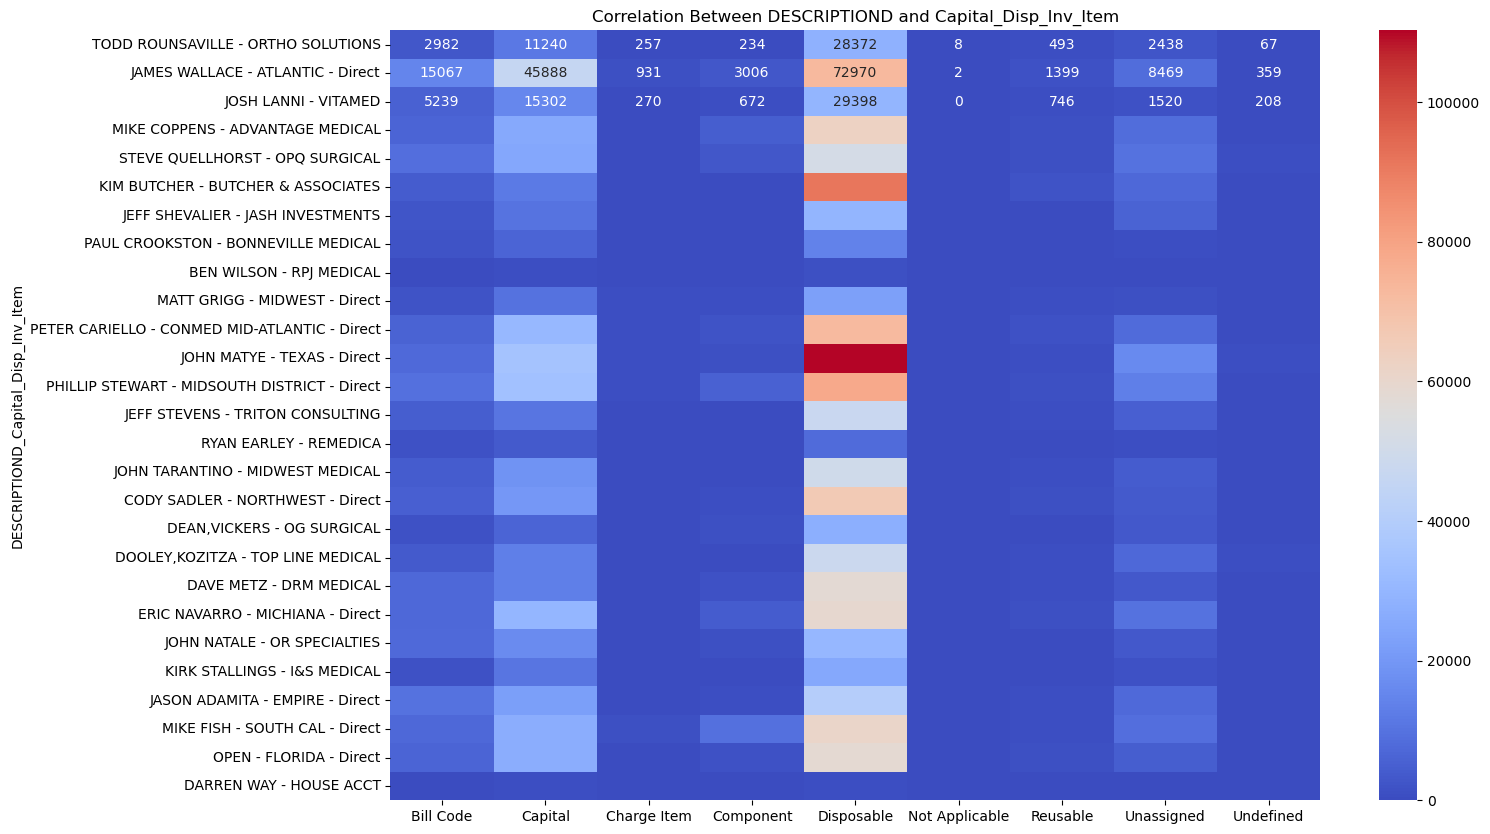

In [21]:
# Convert the cross-tabulation to pandas DataFrame for visualization
pandas_df = cross_tab_df.toPandas()

# Example: Plotting a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set DESCRIPTIOND as the index for better visualization
pandas_df.set_index('DESCRIPTIOND_Capital_Disp_Inv_Item', inplace=True)

# Convert counts to integers
pandas_df = pandas_df.astype(int)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pandas_df, annot=True, fmt="d", cmap="coolwarm")
plt.title("Correlation Between DESCRIPTIOND and Capital_Disp_Inv_Item")
plt.show()


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 40, Finished, Available, Finished)

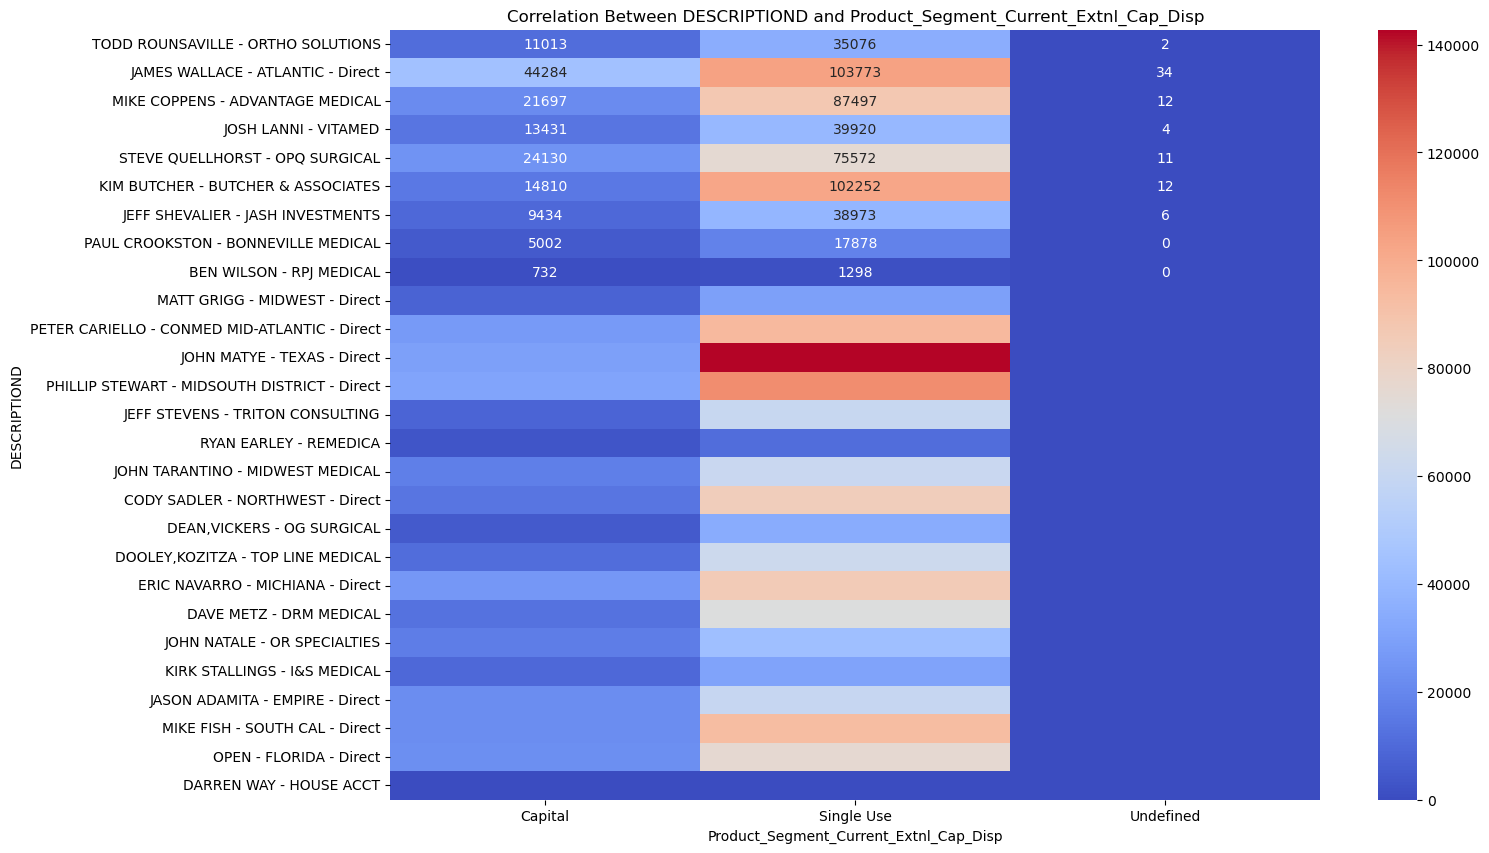

In [38]:
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the columns are in the correct format
df = df.withColumn("Product_Segment_Current_Extnl_Cap_Disp", col("Product_Segment_Current_Extnl_Cap_Disp").cast("string"))

# Perform a cross-tabulation between DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp
cross_tab_df = df.crosstab("DESCRIPTIOND", "Product_Segment_Current_Extnl_Cap_Disp")

# Convert the cross-tabulation to Pandas DataFrame
pandas_df = cross_tab_df.toPandas()

# Set DESCRIPTIOND as the index for better visualization
pandas_df.set_index('DESCRIPTIOND_Product_Segment_Current_Extnl_Cap_Disp', inplace=True)

# Convert counts to integers
pandas_df = pandas_df.astype(int)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pandas_df, annot=True, fmt="d", cmap="coolwarm")
plt.title("Correlation Between DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp")
plt.xlabel("Product_Segment_Current_Extnl_Cap_Disp")
plt.ylabel("DESCRIPTIOND")
plt.show()


In [22]:
# Group by DESCRIPTIOND, Product_Segment_Current_Extnl_Cap_Disp, and Capital_Disp_Inv_Item, then count
correlation_df = df.groupBy(
    "DESCRIPTIOND", 
    "Product_Segment_Current_Extnl_Cap_Disp", 
    "Capital_Disp_Inv_Item"
).count()

# Show the result
correlation_df.show(truncate=False)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 24, Finished, Available, Finished)

+---------------------------------------------+--------------------------------------+---------------------+-----+
|DESCRIPTIOND                                 |Product_Segment_Current_Extnl_Cap_Disp|Capital_Disp_Inv_Item|count|
+---------------------------------------------+--------------------------------------+---------------------+-----+
|PHILLIP STEWART - MIDSOUTH DISTRICT - Direct |Capital                               |Charge Item          |255  |
|JOHN NATALE - OR SPECIALTIES                 |Capital                               |Bill Code            |1101 |
|KIRK STALLINGS - I&S MEDICAL                 |Single Use                            |Reusable             |65   |
|PAUL CROOKSTON - BONNEVILLE MEDICAL          |Single Use                            |Not Applicable       |2    |
|RYAN EARLEY - REMEDICA                       |Capital                               |Reusable             |151  |
|JASON ADAMITA - EMPIRE - Direct              |Capital                          

In [31]:
df.select("Invoiced_Date").show()

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 33, Finished, Available, Finished)

+-------------+
|Invoiced_Date|
+-------------+
|   2021-02-12|
|   2021-03-25|
|   2021-05-26|
|   2021-05-26|
|   2021-05-26|
|   2021-05-26|
|   2021-05-26|
|   2021-05-26|
|   2021-07-30|
|   2021-07-30|
|   2021-07-30|
|   2021-07-30|
|   2021-07-30|
|   2021-09-08|
|   2021-09-27|
|   2021-10-11|
|   2021-10-06|
|   2021-11-16|
|   2021-12-14|
|   2022-01-27|
+-------------+
only showing top 20 rows



In [36]:
from pyspark.sql.functions import col, min, max, datediff

# Ensure the Invoice_Date column is in the correct date format
df = df.withColumn("Invoiced_Date", col("Invoiced_Date").cast("date"))

# Group by DESCRIPTIOND and calculate oldest, most recent, and time interval
date_stats_df = df.groupBy("DESCRIPTIOND").agg(
    min("Invoiced_Date").alias("Oldest_Date"),
    max("Invoiced_Date").alias("Recent_Date")
).withColumn(
    "Time_Interval_Days", datediff(col("Recent_Date"), col("Oldest_Date"))
)

# Sort by Time_Interval_Days in descending order
sorted_df = date_stats_df.orderBy(col("Time_Interval_Days").desc())

# Show the sorted results
sorted_df.show(truncate=False)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 38, Finished, Available, Finished)

+---------------------------------------------+-----------+-----------+------------------+
|DESCRIPTIOND                                 |Oldest_Date|Recent_Date|Time_Interval_Days|
+---------------------------------------------+-----------+-----------+------------------+
|TODD ROUNSAVILLE - ORTHO SOLUTIONS           |2020-01-01 |2024-12-24 |1819              |
|JAMES WALLACE - ATLANTIC - Direct            |2020-01-01 |2024-12-24 |1819              |
|MIKE COPPENS - ADVANTAGE MEDICAL             |2020-01-01 |2024-12-24 |1819              |
|STEVE QUELLHORST - OPQ SURGICAL              |2020-01-01 |2024-12-24 |1819              |
|KIM BUTCHER - BUTCHER & ASSOCIATES           |2020-01-01 |2024-12-24 |1819              |
|JEFF SHEVALIER - JASH INVESTMENTS            |2020-01-01 |2024-12-24 |1819              |
|JOHN MATYE - TEXAS - Direct                  |2020-01-01 |2024-12-24 |1819              |
|PHILLIP STEWART - MIDSOUTH DISTRICT - Direct |2020-01-01 |2024-12-24 |1819              |

In [37]:
all_rows = sorted_df.collect()
for row in all_rows:
    print(row)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 39, Finished, Available, Finished)

Row(DESCRIPTIOND='TODD ROUNSAVILLE - ORTHO SOLUTIONS', Oldest_Date=datetime.date(2020, 1, 1), Recent_Date=datetime.date(2024, 12, 24), Time_Interval_Days=1819)
Row(DESCRIPTIOND='JAMES WALLACE - ATLANTIC - Direct', Oldest_Date=datetime.date(2020, 1, 1), Recent_Date=datetime.date(2024, 12, 24), Time_Interval_Days=1819)
Row(DESCRIPTIOND='MIKE COPPENS - ADVANTAGE MEDICAL', Oldest_Date=datetime.date(2020, 1, 1), Recent_Date=datetime.date(2024, 12, 24), Time_Interval_Days=1819)
Row(DESCRIPTIOND='STEVE QUELLHORST - OPQ SURGICAL', Oldest_Date=datetime.date(2020, 1, 1), Recent_Date=datetime.date(2024, 12, 24), Time_Interval_Days=1819)
Row(DESCRIPTIOND='KIM BUTCHER - BUTCHER & ASSOCIATES', Oldest_Date=datetime.date(2020, 1, 1), Recent_Date=datetime.date(2024, 12, 24), Time_Interval_Days=1819)
Row(DESCRIPTIOND='JEFF SHEVALIER - JASH INVESTMENTS', Oldest_Date=datetime.date(2020, 1, 1), Recent_Date=datetime.date(2024, 12, 24), Time_Interval_Days=1819)
Row(DESCRIPTIOND='JOHN MATYE - TEXAS - Direct',

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 45, Finished, Available, Finished)

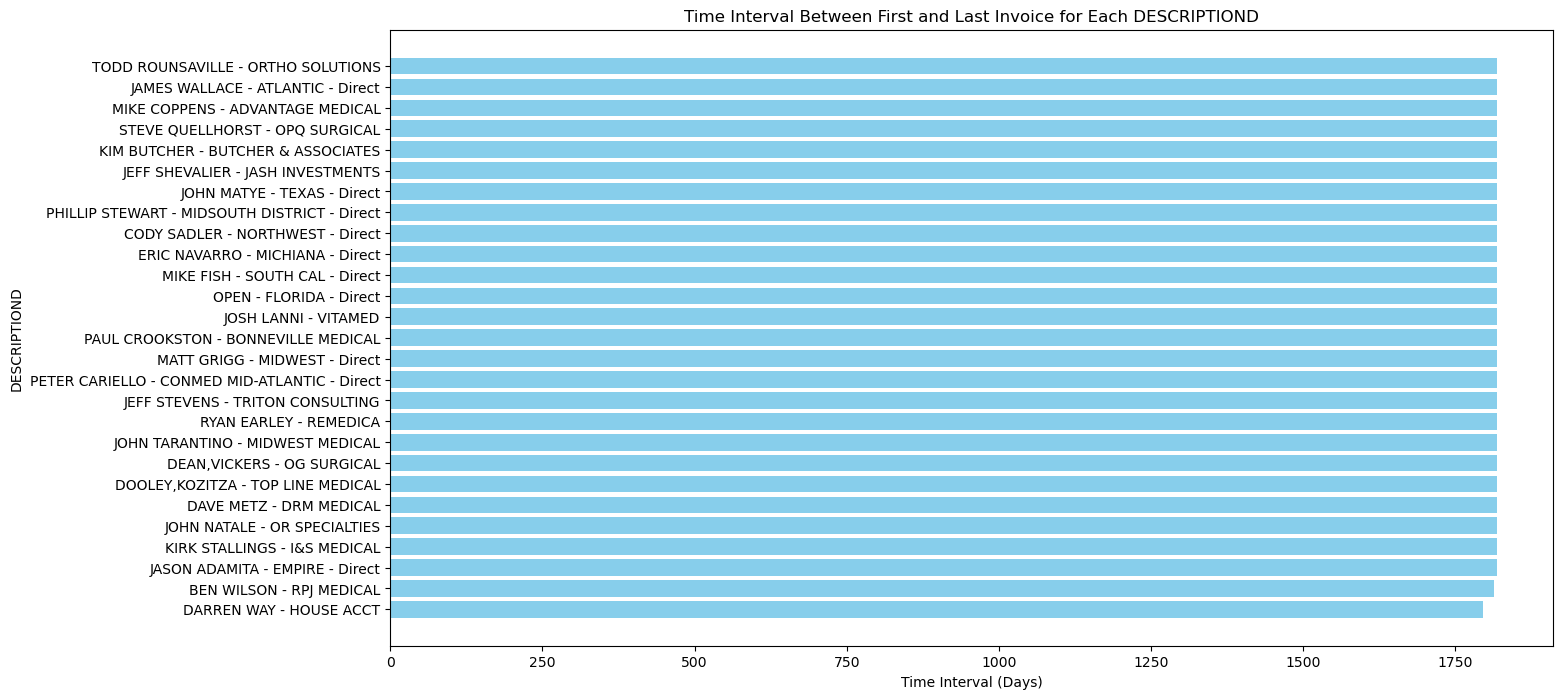

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, min, max, datediff

# Ensure the Invoice_Date column is in the correct date format
df = df.withColumn("Invoiced_Date", col("Invoiced_Date").cast("date"))

# Group by DESCRIPTIOND and calculate oldest, most recent, and time interval
date_stats_df = df.groupBy("DESCRIPTIOND").agg(
    min("Invoiced_Date").alias("Oldest_Date"),
    max("Invoiced_Date").alias("Recent_Date")
).withColumn(
    "Time_Interval_Days", datediff(col("Recent_Date"), col("Oldest_Date"))
)

# Sort by Time_Interval_Days in descending order
sorted_df = date_stats_df.orderBy(col("Time_Interval_Days").desc())

# Convert to Pandas DataFrame for visualization
sorted_pandas_df = sorted_df.toPandas()

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.barh(sorted_pandas_df['DESCRIPTIOND'], sorted_pandas_df['Time_Interval_Days'], color='skyblue')
plt.xlabel("Time Interval (Days)")
plt.ylabel("DESCRIPTIOND")
plt.title("Time Interval Between First and Last Invoice for Each DESCRIPTIOND")
plt.gca().invert_yaxis()  # To display the highest time interval on top
plt.show()


In [55]:
# Count the occurrences of each value in the column
counts_df = df.groupBy("Order_Line_ID").count()

# Show the counts
counts_df.show()

StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 57, Finished, Available, Finished)

+--------------------+-----+
|       Order_Line_ID|count|
+--------------------+-----+
|30472074.00000000...|    1|
|29040910.00000000...|    1|
|29441325.00000000...|    1|
|30516473.00000000...|    1|
|29057684.00000000...|    1|
|30454860.00000000...|    1|
|28746777.00000000...|    1|
|27557143.00000000...|    1|
|29246146.00000000...|    1|
|27883570.00000000...|    1|
|31316539.00000000...|    1|
|29403378.00000000...|    1|
|28805463.00000000...|    1|
|29867886.00000000...|    1|
|28023652.00000000...|    1|
|29085423.00000000...|    1|
|30672692.00000000...|    1|
|27722303.00000000...|    1|
|30137168.00000000...|    1|
|30175052.00000000...|    1|
+--------------------+-----+
only showing top 20 rows



In [60]:
# Get the total count of unique Order_Line_IDs
total_order_line_id_count = df.select("Account_Number").distinct().count()

# Show the result
print("Total unique Order_Line_ID count:", total_order_line_id_count)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 62, Finished, Available, Finished)

Total unique Order_Line_ID count: 11042


In [61]:
from pyspark.sql.functions import col

# Count the number of null values in Order_Line_ID column
null_count = df.filter(col("Order_Line_ID").isNull()).count()

# Show the result
print("Total null values in Order_Line_ID column:", null_count)


StatementMeta(, 49b5d43e-685f-42a0-9ccd-729c56ba22dd, 63, Finished, Available, Finished)

Total null values in Order_Line_ID column: 357814


In [5]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Step 1: Encode 'DESCRIPTIOND' and 'Product_Segment_Current_Extnl_Cap_Disp' using StringIndexer
indexer_descriptiond = StringIndexer(inputCol="DESCRIPTIOND", outputCol="DESCRIPTIOND_Index")
indexer_product = StringIndexer(inputCol="Product_Segment_Current_Extnl_Cap_Disp", outputCol="Product_Index")

# Step 2: Build a pipeline to apply the indexers
pipeline = Pipeline(stages=[indexer_descriptiond, indexer_product])

# Step 3: Apply the pipeline to the DataFrame
df_indexed = pipeline.fit(df).transform(df)

# Step 4: Compute the correlation between the encoded columns
correlation = df_indexed.stat.corr("DESCRIPTIOND_Index", "Product_Index")

# Step 5: Print the correlation value
print("Correlation between DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp:", correlation)


StatementMeta(, 2df15b97-196a-4472-9193-ef639a6b9077, 7, Finished, Available, Finished)

Correlation between DESCRIPTIOND and Product_Segment_Current_Extnl_Cap_Disp: -0.007364326508048765


In [6]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql import functions as F

# Step 1: Encode 'DESCRIPTIOND' and 'Capital_Disp_Inv_Item' using StringIndexer
indexer_descriptiond = StringIndexer(inputCol="DESCRIPTIOND", outputCol="DESCRIPTIOND_Index")
indexer_capital_disp_inv_item = StringIndexer(inputCol="Capital_Disp_Inv_Item", outputCol="Capital_Disp_Inv_Item_Index")

# Step 2: Build a pipeline to apply the indexers
pipeline = Pipeline(stages=[indexer_descriptiond, indexer_capital_disp_inv_item])

# Step 3: Apply the pipeline to the DataFrame
df_indexed = pipeline.fit(df).transform(df)

# Step 4: Compute the correlation between the encoded columns
correlation = df_indexed.stat.corr("DESCRIPTIOND_Index", "Capital_Disp_Inv_Item_Index")

# Step 5: Print the correlation value
print("Correlation between DESCRIPTIOND and Capital_Disp_Inv_Item:", correlation)


StatementMeta(, 2df15b97-196a-4472-9193-ef639a6b9077, 8, Finished, Available, Finished)

Correlation between DESCRIPTIOND and Capital_Disp_Inv_Item: -0.024211809166512565
